## About the Omniglot Dataset:
The omniglot dataset contains 105px\*105px of handwritten characters from 50 real and fictitious alphabets. The dataset has been divided in to a training set, inside the `images_background` folder and a test set under the `images_evaluation` folder. Both datasets are disjoint, each containing a different set of alphabets. For example Greek alphabet is present in the training dataset but not in the test set, while Mongolian is present in the test set but not in the training set. The training set has 30 different alphabets, while the test set has 20. The number of characters in every language varies a lot but overall the 50 alphabets encompass 1623 characters. For each character there are exactly 20 samples, each of which has been written by a different writer (drawer). So the total number of images is 1623\*20 = 32460.  

**Note:** The original omniglot dataset recorded stroke and time information that gave hints on how a particular character was drawn. This information could be useful to an online handwriting recognition system but we intend to use an offline approach, that uses images of the  characters instead of the stroke information for a more holistic approach.

In [1]:
from glob import glob

In [2]:
train_paths = './python/images_background/'
test_paths = './python/images_evaluation/'

In [3]:
train_directories = glob(train_paths+'*')
test_directories = glob(test_paths+'*')

In [4]:
train_alphabet_to_path = dict([(path.split('/')[-1],path) for path in train_directories])
test_alphabet_to_path = dict([(path.split('/')[-1],path) for path in test_directories])

**Print names and number of alphabets in train and test sets.**

In [5]:
print('Training set:',f'{len(train_alphabet_to_path)} alphabets\n',list(train_alphabet_to_path.keys()),'\n')
print('Test set:',f'{len(test_alphabet_to_path)} alphabets\n',list(test_alphabet_to_path.keys()))

Training set: 30 alphabets
 ['Japanese_(hiragana)', 'Mkhedruli_(Georgian)', 'Latin', 'Hebrew', 'Gujarati', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'N_Ko', 'Asomtavruli_(Georgian)', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Syriac_(Estrangelo)', 'Grantha', 'Anglo-Saxon_Futhorc', 'Alphabet_of_the_Magi', 'Sanskrit', 'Bengali', 'Tagalog', 'Tifinagh', 'Futurama', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Malay_(Jawi_-_Arabic)', 'Early_Aramaic', 'Armenian', 'Burmese_(Myanmar)', 'Japanese_(katakana)', 'Arcadian', 'Balinese', 'Korean', 'Cyrillic', 'Greek', 'Braille'] 

Test set: 20 alphabets
 ['Malayalam', 'Mongolian', 'Old_Church_Slavonic_(Cyrillic)', 'Keble', 'Manipuri', 'Sylheti', 'Aurek-Besh', 'Ge_ez', 'Tengwar', 'Kannada', 'Syriac_(Serto)', 'Avesta', 'Oriya', 'Glagolitic', 'Tibetan', 'Atemayar_Qelisayer', 'Gurmukhi', 'Atlantean', 'ULOG', 'Angelic']


### Load datasets
The function `load_data()` takes a dictionary mapping alphabets in a dataset to their directories. It returns a list of triples, each triple of the form `(alphabet_name, data, character_code)`. The character code is derived from the file name and is a 3 or 4 digit integer. 

When the parameter `simulate` is set to true, `data` is just the full path of the character image, otherwise it is the image data.  

In [6]:
from PIL import Image
import numpy as np
from os import path

def load_data(alphabet_to_path, simulate=False):
    def _filename_to_charcode_(name:str):
        """:param name: Filename of the type n1n2n3n4_mm.xyz
        :returns: n1n2n3n4 converted to integer.
        """
        return int(name.split('.')[0].split('_')[0])
        
    def _load_img_file_(file_path:str):
        """Loads the image data from a single image file.
        :param file_path: Absolute or relative path to an image file.
        :returns: A tuple. If simulate is True the first member of the tuple is the path to the image file 
        otherwise it is a numpy array contianing the image data. 
        and the second member is an integer code for character in the image.
        """
        data =  file_path if simulate else np.array(Image.open(file_path), dtype=np.float)
        return data, _filename_to_charcode_(path.basename(file_path))
    
    def _load_char_dir_(dir_path):
        """Loads the image data for every image file for a particular character.
        :param dir_path: Path(string) to a directory containing one or more image files.
        :returns: A list of tuples, each tuple has image data as its first member and a character code 
        as the second member.
        """
        file_paths = glob(dir_path+'/*')
        return [_load_img_file_(file_path) for file_path in file_paths]
    
    def _load_alphabet_dir_(dir_path):
        """Loads the image data for every character in an alphabet (say Greek).
        :param dir_path: Path(string) to a directory corresponding to an alphabet, containing one or more directories,
        one each for every character in the alphabet.
        :returns: A list of tuples, each tuple has image data as its first member and a character code 
        as the second member.
        """
        char_dir_paths = glob(dir_path+'/*')
        # Flatten list from individual character-level directories into a single list of tuples.
        return [data_and_label for char_dir_path in char_dir_paths for data_and_label in _load_char_dir_(char_dir_path) ]
    
    ## Build list of triples (alphabet_name, data, character_code)
    return [(k,*alphabet_data) for k in alphabet_to_path for alphabet_data in _load_alphabet_dir_(alphabet_to_path[k]) ]

### Load Data
Load both background (train) and evalutaion (test) set. We load only the filepaths not their contents.

In [7]:
train_data = load_data(train_alphabet_to_path, simulate=True)
test_data  = load_data(test_alphabet_to_path , simulate=True)

In [8]:
train_data[:10]

[('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_17.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_18.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_04.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_13.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_02.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_03.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_10.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_08.png',
  523),
 ('Japanese_(hiragana)',
  './python/images_background/Japanese_(hiragana)/character36/0523_14.png',
  523),
 ('Japanese_(hiraga

### Convert to dataframe

In [9]:
import pandas as pd

In [10]:
col_names = ['alphabet','path','charcode']

In [11]:
train_df = pd.DataFrame(train_data, columns=col_names)
test_df = pd.DataFrame(test_data, columns=col_names)

In [12]:
train_df.head()

,alphabet,path,charcode
0,Japanese_(hiragana),./python/images_background/Japanese_(hiragana)...,523
1,Japanese_(hiragana),./python/images_background/Japanese_(hiragana)...,523
2,Japanese_(hiragana),./python/images_background/Japanese_(hiragana)...,523
3,Japanese_(hiragana),./python/images_background/Japanese_(hiragana)...,523
4,Japanese_(hiragana),./python/images_background/Japanese_(hiragana)...,523


In [13]:
test_df.head()

,alphabet,path,charcode
0,Malayalam,./python/images_evaluation/Malayalam/character...,1307
1,Malayalam,./python/images_evaluation/Malayalam/character...,1307
2,Malayalam,./python/images_evaluation/Malayalam/character...,1307
3,Malayalam,./python/images_evaluation/Malayalam/character...,1307
4,Malayalam,./python/images_evaluation/Malayalam/character...,1307


Print number of alphabets.

In [16]:
print(train_df.alphabet.unique().shape, test_df.alphabet.unique().shape)

(30,) (20,)


Print number of unique characters.

In [17]:
print(train_df.charcode.unique().shape, test_df.charcode.unique().shape)

(964,) (659,)


Print total number of instances.

In [18]:
print(len(train_data), len(test_data))

19280 13180


### View a few character images.

In [19]:
import matplotlib.pyplot as plt

def img_grid(imgs, labels=None, nb_cols=8):
    nb_imgs = len(imgs)
    nb_rows = np.ceil(nb_imgs/nb_cols)
    
    plt.figure(figsize=(nb_cols, nb_rows))
    for i in range(nb_imgs):
        plt.tight_layout(w_pad=0.5)
        plt.subplot(nb_rows, nb_cols, i+1,)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgs[i], cmap='gray')
        if labels is not None:
            plt.ylabel(labels[i] )
    
    plt.plot()
    

In [20]:
def display_chars(df):
    labels = list(df.charcode)
    img_data = list(map(Image.open,df.path))
    
    img_grid(img_data, labels)

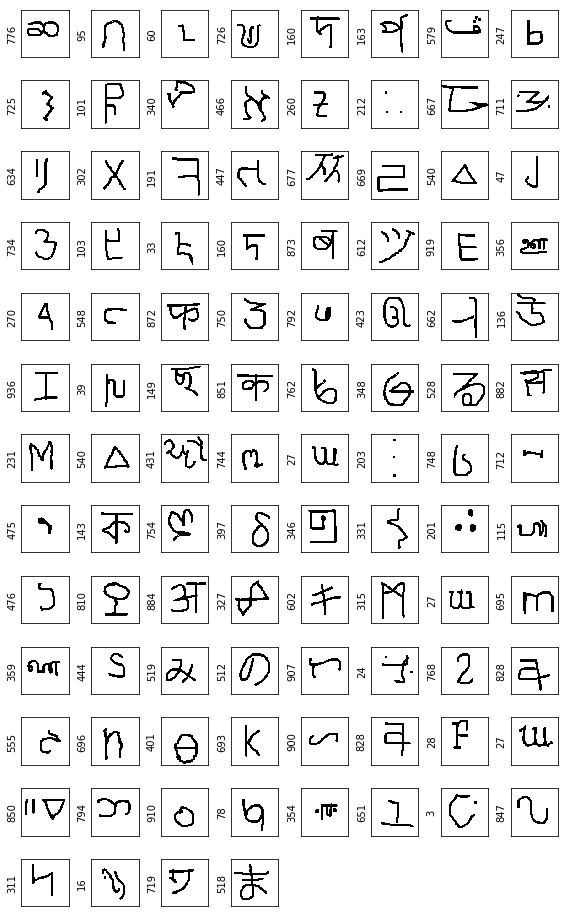

In [21]:
random_indices = np.random.choice(range(len(train_df)),size=100,replace=False)
display_chars(train_df.iloc[list(random_indices)])

## Understanding The Classification Task
The omniglot dataset is different from regular classification datasets in two aspects:

- The number of instances (drawings) per class is just 20.
- The background set, meant to be used for training, is disjoint with the evaluation set.

The omniglot dataset was designed for one-shot learning, where a classifier has to look at a **test instance** of an unknown class and one instance each from $N$ other unknown classes and then predict the target class of the test instance based on its similarity to the sample instances. This is known as N-way 1-shot learning because there are $N$ possible target classes and the classifier gets to look at exactly 1 instance per class to identify the most similar class. 

In a variation, that can be called N-way, k-shot learning, there are N target classes and $k$ instances per class.

Here is an example of 20-way 1-shot learning task from the paper **Siamese Neural Networks for One-shot Image Recognition** by Salakhuditnov et. al. 
![20 way 1-shot classification on Omniglot dataset](res/20way.png)

*The lone test image is shown above the grid
of 20 images representing the possible unseen classes that we can
choose for the test image. These 20 images are our only known
examples of each of those classes.*

---

## Traditional Supervrised Training Methodology
In any traditional classification approach, the classifier is trained with inputs of the form 

$$[(x_1,y_1),\ (x_2,y_2),\ ...\ (x_n,y_n)]$$

where the $x_i$ are instances of data from different classes and the $y_i$ are the corresponding labels.

Such a classifier, having model parameters $\Theta$, learns to find discriminative features $f(x,\Theta)$ and predict class probabilities $\hat{y}=g(f(x,\Theta))$ so as to minimize some loss $L(\cdot)$ that is a function of the actual class labels  and the class probabilities predicted by the classifier:

$$\underset {\Theta}{min}\  \sum \limits_{i=1}^{n} L(y_i, \hat{y_i}) \equiv \underset {\Theta}{min}\  \sum \limits_{i=1}^{n} L(y_i,g(f(x_i,\Theta))) $$

Given enough instances of data per class, the classifier learns to recognize intra-class variations from inter-class variations without explicitly being designed to do so.

**The omniglot dataset has only 20 images per character and it is very difficult to train a classifier to learn to recognize the characters in the training set with such a limited amount of data. More importantly, the train and test sets are disjoint so a classifier trained to discriminate among the characters in the training set is unlikely to learn to generalize to discriminate among the characters in the test set. **


## Supervised Training for Performing Pairwise Discrimination
An alternative approach that works with a smaller datasets is to explicitly train a classifier with pairs of inputs of the form $[\big((x_1,y_1),(x_1',y_1')\big),\ \big((x_2,y_2),(x_2',y_2')\big)\ ...\ \big((x_n,y_n),(x_n',y_n')\big)]$. The classifier learns to find the discriminative features $f(x_i,x_i',\Theta)$ and predict the  probability $ \hat{y_i} = g(f(x_i,x_i',\Theta))$, that the two instances $x_i$, $x_i'$, that are part of the $i^{th}$ training example are dissimilar, by minimizing a loss function $L(\cdot)$, that is function of the actual dissimilarity and the predicted dissimilarity:
$$\underset \Theta min  \sum \limits_{i=1}^{n} L\left(D(y_i,y_i'), \hat{y_i}\right) \equiv \underset \Theta min \sum \limits_{i=1}^{n}  L\left(D(y_i, y_i'), g\left(f(x_i,x_i',\Theta)\right)\right)$$

where $D(\cdot)$ is a symmetric (dis)similarity function.

If the pairs $(x_i, x_i')$ are randomized the network learns to discriminate pairs of instances without consideration to their order. In other words, the network learns a symmetric score function for the (dis)similarity of instances in a pair. 

For a training set with a moderate size $n$, the number of training pairs that could be formed is $O(n^2)$ and so the problem of small data is solved. Because the network learns to discriminate instances in pairs the problem of a disjoint train and test sets is also solved. 

To test the generalization ability of such a network, it is fed pairs of inputs from the test set. If the netowrk is trained to learn the right features, it is able to discriminate pairs of inputs, neither of which it has seen before.  

---

## Siamese Network Architecture for Pairwise Discrimination
The idea behind Siamese Network Architecture is that we can train a convolution neural network to output a compressed representation of its input, then feed it two inputs, and then take the two outputs and pass them through a function that finds the similarity between the two outputs. This combination of neural network followed by a similarity function is then trained on similar and dissimilar input pairs. A sigmoid function can be applied to the output of the similarity function to ensure that the similarity always lies in the range [0,1]

From the paper **Siamese Neural Networks for One-shot Image Recognition**: Siamese nets were first introduced in the early 1990s by Bromley and LeCun to solve signature verification as an image matching problem. A siamese neural network consists of twin networks which accept distinct inputs but are joined by an energy function at the top. This function computes some metric between the highest level feature representation on each side. The parameters between the twin networks are tied. Weight tying guarantees that two extremely similar images could not possibly be mapped by their respective networks to very different locations in feature space because each network computes the same function. Also, the network is symmetric, so that whenever we present two distinct images to the twin networks, the top conjoining layer will compute the same metric as if we were to we present the same two images but to the opposite twins.

![Siamese Network](res/siamese.png)

## Sampling Strategy for Training and Testing

## Splitting Training Data for Cross Validation